In [61]:
# Create a directory named '.kaggle' in the home directory
# This directory will store your Kaggle API credentials
!mkdir ~/.kaggle

# Copy the 'kaggle.json' file (which contains your Kaggle API credentials)
# into the '.kaggle' directory
!cp kaggle.json ~/.kaggle/

# Change the file permissions of 'kaggle.json' to be readable and writable only by the owner
# This ensures your API key remains secure
!chmod 600 ~/.kaggle/kaggle.json

# Use the Kaggle API to download the 'California Housing Prices' dataset
# The dataset identifier is 'camnugent/california-housing-prices'
!kaggle datasets download -d camnugent/california-housing-prices

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices
License(s): CC0-1.0
california-housing-prices.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
# Unzips the 'california-housing-prices.zip' file in the current directory
!unzip california-housing-prices.zip

Archive:  california-housing-prices.zip
  inflating: housing.csv             


In [62]:
# Importing pandas to work with data in a DataFrame format
import pandas as pd

# Reading the 'housing.csv' file into a pandas DataFrame
housing_pd = pd.read_csv('housing.csv')

# Displaying the first 5 rows of the DataFrame to inspect the data
housing_pd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [63]:
# Get the count of unique values in the 'ocean_proximity' column
housing_pd['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [64]:
# Shuffle the rows of the 'housing_pd' DataFrame
housing_pd_shuffled = housing_pd.sample(n=len(housing_pd), random_state=1)

# Display the shuffled DataFrame
housing_pd_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


In [65]:
# Apply one-hot encoding to the 'ocean_proximity' column
pd.get_dummies(housing_pd_shuffled['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,True,False,False,False,False
2151,False,True,False,False,False
15927,False,False,False,True,False
82,False,False,False,True,False
8161,True,False,False,False,False


In [66]:
# Drop the 'ocean_proximity' column from the shuffled DataFrame
housing_pd_shuffled.drop('ocean_proximity', axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0


In [67]:
# Concatenate the DataFrame with the 'ocean_proximity' column removed
# with the one-hot encoded columns for 'ocean_proximity'
housing_pd_final = pd.concat(
    [housing_pd_shuffled.drop('ocean_proximity', axis=1),  # Drop the 'ocean_proximity' column
     pd.get_dummies(housing_pd_shuffled['ocean_proximity'])],  # Get the one-hot encoded columns for 'ocean_proximity'
    axis=1  # Concatenate along columns (axis=1)
)

# Display the final DataFrame
housing_pd_final


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,True,False,False,False,False
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,False,True,False,False,False
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,False,False,False,True,False
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,False,False,False,True,False
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,True,False,False,False,False
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,True,False,False,False,False
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,True,False,False,False,False
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,False,True,False,False,False


In [68]:
# Reorder and select specific columns from the 'housing_pd_final' DataFrame
housing_pd_final = housing_pd_final[['longitude', 'latitude',
                                     'housing_median_age', 'total_rooms',
                                     'total_bedrooms', 'population',
                                     'households', 'median_income',
                                     '<1H OCEAN', 'INLAND', 'ISLAND',
                                     'NEAR BAY', 'NEAR OCEAN', 'median_house_value']]

# Display the updated DataFrame
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,True,False,False,False,False,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,False,True,False,False,False,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,False,False,False,True,False,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,False,False,False,True,False,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,True,False,False,False,False,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,True,False,False,False,False,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,True,False,False,False,False,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,True,False,False,False,False,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,False,True,False,False,False,140700.0


In [69]:
# Drop rows with missing values (NaN) from the 'housing_pd_final' DataFrame
housing_pd_final = housing_pd_final.dropna()

# Get the number of rows remaining in the cleaned DataFrame
len(housing_pd_final)

20433

In [70]:
# Split the dataset into training, testing, and validation sets
train_pd, test_pd, val_pd = housing_pd_final[:18000], housing_pd_final[18000:19217], housing_pd_final[19215:]

# Get the lengths of each set
len(train_pd), len(test_pd), len(val_pd)

(18000, 1217, 1218)

In [71]:
# Split the 'train_pd', 'val_pd', and 'test_pd' DataFrames into features (X) and target variable (y)
X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

# Get the shapes of the resulting arrays
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((18000, 13), (18000,), (1218, 13), (1218,), (1217, 13), (1217,))

In [72]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
import numpy as np

# Initialize and fit the StandardScaler on the first 8 columns of the training data
scaler = StandardScaler().fit(X_train[:, :8])

# Define the preprocessor function
def preprocessor(X):
    A = np.copy(X)  # Create a copy of the input array to avoid modifying the original data
    A[:, :8] = scaler.transform(A[:, :8])  # Apply the scaling transformation to the first 8 columns
    return A

# Apply the preprocessor to the training, validation, and test sets
X_train, X_val, X_test = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)

In [73]:
X_train.shape, X_val.shape, X_test.shape

((18000, 13), (1218, 13), (1217, 13))

In [74]:
pd.DataFrame(X_train_preprocessed).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.603443,-0.736073,0.820845,0.081039,0.315396,-0.27684,0.328234,-0.326667,True,False,False,False,False
1,-0.105122,0.537108,0.661774,-0.206526,-0.196843,-0.246809,-0.160526,-0.995001,False,True,False,False,False
2,-1.422454,0.981785,1.377592,-0.374924,-0.301674,0.098553,-0.244613,0.074459,False,False,False,True,False
3,-1.352596,1.019231,1.854804,-1.055419,-1.049782,-1.07974,-1.082862,-1.235508,False,False,False,True,False
4,0.718211,-0.848412,0.661774,-0.507894,-0.589957,-0.628385,-0.567825,0.687448,True,False,False,False,False


<Axes: >

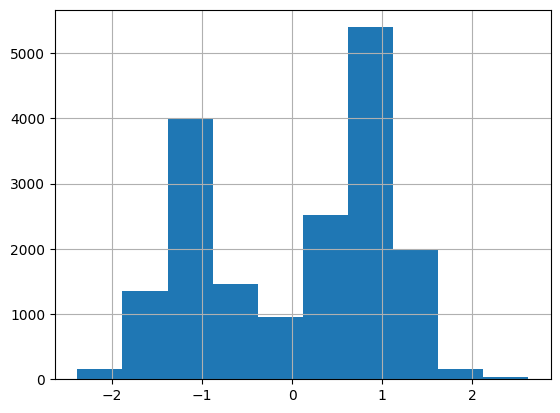

In [75]:
pd.DataFrame(X_train_preprocessed)[0].hist()

In [76]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

# Fit the model
lm = LinearRegression().fit(X_train, y_train)

# Calculate RMSE for training and validation
train_rmse = np.sqrt(mse(lm.predict(X_train), y_train))
val_rmse = np.sqrt(mse(lm.predict(X_val), y_val))

# Print RMSE values
print(f"Training RMSE: {train_rmse}")
print(f"Validation RMSE: {val_rmse}")


Training RMSE: 68593.05578127236
Validation RMSE: 71382.43558330165


In [77]:
from sklearn.neighbors import KNeighborsRegressor

# Train the KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)

# Calculate RMSE for training and validation
train_rmse = np.sqrt(mse(knn.predict(X_train), y_train))
val_rmse = np.sqrt(mse(knn.predict(X_val), y_val))

# Print the results
print(f"Training RMSE: {train_rmse}")
print(f"Validation RMSE: {val_rmse}")

Training RMSE: 53759.09908812057
Validation RMSE: 62161.22860469906


In [78]:
from sklearn.ensemble import RandomForestRegressor

# Train the RandomForestRegressor
rfr = RandomForestRegressor(max_depth=10).fit(X_train, y_train)

# Calculate RMSE for training and validation
train_rmse = np.sqrt(mse(rfr.predict(X_train), y_train))
val_rmse = np.sqrt(mse(rfr.predict(X_val), y_val))

# Print the results
print(f"Training RMSE: {train_rmse}")
print(f"Validation RMSE: {val_rmse}")

Training RMSE: 43519.216391527676
Validation RMSE: 53295.31371035366


In [79]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the RandomForestRegressor
gbr = GradientBoostingRegressor(n_estimators=250).fit(X_train, y_train)

# Calculate RMSE for training and validation
train_rmse = np.sqrt(mse(gbr.predict(X_train), y_train))
val_rmse = np.sqrt(mse(gbr.predict(X_val), y_val))

# Print the results
print(f"Training RMSE: {train_rmse}")
print(f"Validation RMSE: {val_rmse}")

Training RMSE: 47274.82259072157
Validation RMSE: 51414.90073691984
